## 0-1re

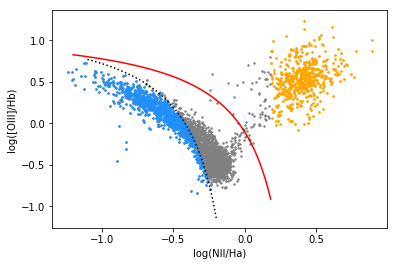

In [59]:
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.table import Table

def bpt(OIII,Hb,NII,Ha):
    x=np.log10(NII/Ha)
    y=np.log10(OIII/Hb)
#     if y>0.61/(x-0.05)+1.3:
#         print('AGN')
#     elif y<=0.61/(x-0.05)+1.3 and y>0.61/(x-0.47)+1.19:
#         print('composite')
#     elif y<=0.61/(x-0.47)+1.19：
#         print('sf')
    
    
def plot_bpt():
    f_kd02='/Users/astro/Documents/notebooks/zs/2019-10-18/1.0re_1/res/z_kd02_10_25.fits'
    f_z925='/Users/astro/Documents/notebooks/zs/pair-m-z/z_9_25.txt'
    with fits.open(f_kd02) as f:
        data=f[1].data
        plateifu=data['PLATEIFU']
        NII=data['NII']
        OIII=data['OIII']
        Ha=data['Halpha']
        Hb=data['Hbeta']

        
        x=[]
        y=[]
        t=Table.read(f_z925,format='ascii')
        for i in t['plateifu']:
            index=np.where(plateifu==i)[0]
            x1=np.log10(NII[index]/Ha[index])
            y1=np.log10(OIII[index]/Hb[index])
            
            x.extend(x1)
            y.extend(y1)
        
         
        plt.figure()
        plt.scatter(x,y,s=3,color='orange',label='z_do2>9.25')
        x_bpt=np.arange(-1.2,0.2,0.02)
        y_bpt=0.61/(x_bpt-0.47)+1.19
        x_bpt1=np.arange(-1.1,-0.2,0.02)
        y_bpt1=0.61/(x_bpt1-0.05)+1.3
        plt.plot(x_bpt1,y_bpt1,"k:")
        plt.plot(x_bpt,y_bpt,'r')
        
        
        x_normal=[]
        y_normal=[]
        pifu=np.setdiff1d(plateifu,t['plateifu'])
        for j in pifu:
            index_1=np.where(plateifu==j)[0]
            x_normal.extend(np.log10(NII[index_1]/Ha[index_1]))
            y_normal.extend(np.log10(OIII[index_1]/Hb[index_1]))
            
        # pick up SF
        
        mask=(np.array(y_normal)<=0.61/(np.array(x_normal)-0.05)+1.3)&(np.array(x_normal)<0)
        
        pifu_sf=pifu[mask]
        x_sf=np.array(x_normal)[mask]
        y_sf=np.array(y_normal)[mask]
            
        plt.scatter(x_normal,y_normal,color='grey',s=2)
        plt.scatter(x_sf,y_sf,color='dodgerblue',s=2)
        plt.xlabel('log(NII/Ha)')
        plt.ylabel('log([OIII]/Hb)')
            
        plt.show()
        
        t=Table([pifu_sf.T],names=['plateifu'])
        t.write('/Users/astro/Documents/notebooks/zs/pair-m-z/plateifu_sf.fits')
        # 1085
    
if __name__=='__main__':
    plot_bpt()


1085 (1085,)


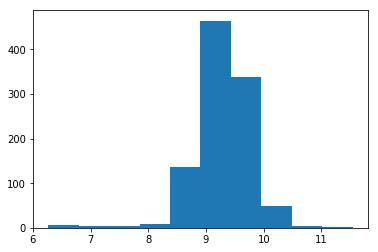

In [75]:
from astropy.io import fits
import numpy as np

def mass():
    with fits.open('/Users/astro/Documents/notebooks/zs/pair-m-z/plateifu_sf.fits') as f_sf:
        plateifu=f_sf[1].data.field('plateifu')
        mass_sf=[]
        ifu_sf=[]
        with fits.open('/Users/astro/Documents/notebooks/zs/2019-10-18/1.0re_1/res/z_kd02_10_25.fits') as f_kd02:
            data=f_kd02[1].data
            mass=data['mass_avg']
            plateifu_kd=data['PLATEIFU']
            
            for i in range(0,len(plateifu_kd)):
                if plateifu_kd[i] in plateifu:
                    
                    mass_sf.append(mass[i])
                    ifu_sf.append(plateifu_kd[i])
            print(len(ifu_sf),plateifu.shape)
#             if np.array_equal(ifu_sf,plateifu):
#                 print('ifu equal')
            mask=(np.array(mass_sf)>0)
            plt.hist(np.array(mass_sf)[mask])
            plt.show()
    
if __name__=='__main__':
    mass()

In [55]:
np.array(pifu_sf)

NameError: name 'pifu_sf' is not defined

## 1-1.5re

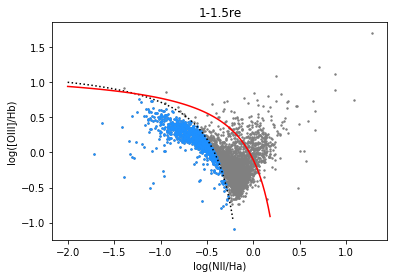

In [82]:
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.table import Table

def bpt(OIII,Hb,NII,Ha):
    x=np.log10(NII/Ha)
    y=np.log10(OIII/Hb)
#     if y>0.61/(x-0.05)+1.3:
#         print('AGN')
#     elif y<=0.61/(x-0.05)+1.3 and y>0.61/(x-0.47)+1.19:
#         print('composite')
#     elif y<=0.61/(x-0.47)+1.19：
#         print('sf')
    return x,y
    
    
def plot_bpt():
    f_kd02='//Users/astro/Documents/notebooks/zs/2019-09-17/m-z/z_kd02_09_30_1900.fits'
    f_z925='/Users/astro/Documents/notebooks/zs/pair-m-z/z_9_25.txt'
    with fits.open(f_kd02) as f:
        data=f[1].data
        plateifu=data['PLATEIFU']
        NII=data['NII']
        OIII=data['OIII']
        Ha=data['Halpha']
        Hb=data['Hbeta']
         
        plt.figure()
        x_bpt=np.arange(-2,0.2,0.02)
        y_bpt=0.61/(x_bpt-0.47)+1.19
        x_bpt1=np.arange(-2,-0.2,0.02)
        y_bpt1=0.61/(x_bpt1-0.05)+1.3
        plt.plot(x_bpt1,y_bpt1,"k:")
        plt.plot(x_bpt,y_bpt,'r')
        
        
        x=[]
        y=[]
        for nii,oiii,hb,ha in zip(NII,OIII,Hb,Ha):
            x1,y1=bpt(oiii,hb,nii,ha)
            x.append(x1)
            y.append(y1)
            
        # pick up SF
        
        mask=(np.array(y)<=0.61/(np.array(x)-0.05)+1.3)&(np.array(x)<0)
        
        pifu_sf=plateifu[mask]
        x_sf=np.array(x)[mask]
        y_sf=np.array(y)[mask]
            
        plt.scatter(x,y,color='grey',s=2)
        plt.scatter(x_sf,y_sf,color='dodgerblue',s=2)
        plt.xlabel('log(NII/Ha)')
        plt.ylabel('log([OIII]/Hb)')
        plt.title('1-1.5re')
            
        plt.show()
        
#         t=Table([pifu_sf.T],names=['plateifu'])
#         t.write('/Users/astro/Documents/notebooks/zs/pair-m-z/plateifu_sf_1_1.5re.fits')
        # 1085
    
if __name__=='__main__':
    plot_bpt()
